<a href="https://colab.research.google.com/github/mayur7garg/66DaysOfData/blob/main/Day%205/Plotly_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotly Basics
**Plotly plots may not be visible in GitHub. Rerun the notebook in [Colab](https://colab.research.google.com/github/mayur7garg/66DaysOfData/blob/main/Day%205/Plotly_Basics.ipynb) or view this notebook in [nbviewer](https://nbviewer.jupyter.org/github/mayur7garg/66DaysOfData/blob/main/Day%205/Plotly_Basics.ipynb) to view the plots.**

In [1]:
!pip install plotly==5.1.0
!pip install cufflinks
!pip install chart_studio

## Imports

In [2]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py # To create charts
import cufflinks as cf # Enables plotly for pandas
import seaborn as sns
import plotly.express as px
import IPython
%matplotlib inline

#Enable plotly to work in a notebook in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
#Required to make plotly graphs visible in Google Colab
#Comment this out when running locally
import plotly.io as pio
pio.renderers.default = 'colab'

## Line Charts

In [4]:
arr_1 = np.random.randn(50, 4)
df_1 = pd.DataFrame(arr_1, columns = ['A','B','C','D'])
df_1.head()

A         B         C         D
0  1.057404  0.786800 -1.049058  0.479640
1 -0.884266 -0.002384 -0.569487 -0.327685
2 -0.873214 -0.134243  0.821269  2.249791
3 -1.559427 -0.713957  0.138313  0.140460
4  0.471218 -0.826155 -1.189645  0.375011

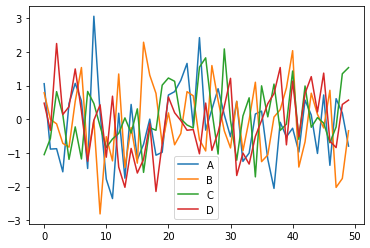

In [5]:
#Matplotlib plot
df_1.plot()

In [6]:
#Plotly plot
df_1.iplot()

In [7]:
df_stocks = px.data.stocks()
df_stocks.head()

date      GOOG      AAPL      AMZN        FB      NFLX      MSFT
0  2018-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
1  2018-01-08  1.018172  1.011943  1.061881  0.959968  1.053526  1.015988
2  2018-01-15  1.032008  1.019771  1.053240  0.970243  1.049860  1.020524
3  2018-01-22  1.066783  0.980057  1.140676  1.016858  1.307681  1.066561
4  2018-01-29  1.008773  0.917143  1.163374  1.018357  1.273537  1.040708

In [8]:
import plotly.graph_objects as go

px.line(df_stocks, x = 'date', y = 'GOOG', labels = {'x':'Date', 'y':'Price'})

px.line(df_stocks, x = 'date', y = ['GOOG','AAPL'], labels = {'x':'Date', 'y':'Price'},
       title = 'Apple Vs. Google')

In [9]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = df_stocks.date, y = df_stocks.AAPL, 
                        mode = 'lines', name = 'Apple'))
fig.add_trace(go.Scatter(x = df_stocks.date, y = df_stocks.AMZN, 
                        mode = 'lines+markers', name = 'Amazon'))

fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG, 
                        mode = 'lines+markers', name = 'Google',
                        line=dict(color = 'firebrick', width = 2, dash = 'dashdot')))

fig.update_layout(
    xaxis = dict(
        title = 'Date',
        showline = True,
        showgrid = False,
        showticklabels = True,
        linecolor = 'rgb(204, 204, 204)',
        linewidth = 2,
        ticks = 'outside',
        tickfont = dict(
            family = 'Arial',
            size = 12,
            color = 'rgb(82, 82, 82)',
        ),
    ),
    yaxis = dict(
        title = 'Price',
        showgrid = False,
        zeroline = False,
        showline = False,
        showticklabels = False,
    ),
    autosize = False,
    margin=dict(
        autoexpand = False,
        l = 20,
        r = 20,
        t = 60,
    ),
    showlegend = False,
    plot_bgcolor = 'white',
    title = 'Stock Price Data 2018 - 2020'
)

## Bar Charts

In [10]:
df_us = px.data.gapminder()
df_us.head()

country continent  year  ...   gdpPercap  iso_alpha  iso_num
0  Afghanistan      Asia  1952  ...  779.445314        AFG        4
1  Afghanistan      Asia  1957  ...  820.853030        AFG        4
2  Afghanistan      Asia  1962  ...  853.100710        AFG        4
3  Afghanistan      Asia  1967  ...  836.197138        AFG        4
4  Afghanistan      Asia  1972  ...  739.981106        AFG        4

[5 rows x 8 columns]

In [11]:
df_us = df_us.query("country == 'United States'")
px.bar(df_us, x = 'year', y = 'pop')

In [12]:
df_tips = px.data.tips()
df_tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [13]:
px.bar(df_tips, x = 'day', y = 'tip', color = 'sex', title = 'Tips by Sex on Each Day',
      labels={'tip': 'Tip Amount', 'day': 'Day of the Week'})

In [14]:
px.bar(df_tips, x = "sex", y = "total_bill",
             color = 'smoker', barmode = 'group')

In [15]:
df_europe = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
df_europe.head()

country continent  year  ...     gdpPercap  iso_alpha  iso_num
23                  Albania    Europe  2007  ...   5937.029526        ALB        8
83                  Austria    Europe  2007  ...  36126.492700        AUT       40
119                 Belgium    Europe  2007  ...  33692.605080        BEL       56
155  Bosnia and Herzegovina    Europe  2007  ...   7446.298803        BIH       70
191                Bulgaria    Europe  2007  ...  10680.792820        BGR      100

[5 rows x 8 columns]

In [16]:
fig = px.bar(df_europe, y = 'pop', x = 'country', text = 'pop', color = 'country')
fig

In [17]:
fig.update_traces(texttemplate = '%{text:.2s}', textposition = 'outside')
fig.update_layout(uniformtext_minsize = 8)

In [18]:
fig.update_layout(xaxis_tickangle=-45)

## Scatter Plots

In [19]:
df_iris = px.data.iris()
df_iris.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

In [20]:
px.scatter(df_iris, x = "sepal_width", y = "sepal_length", color = "species",
                 size = 'petal_length', hover_data = ['petal_width'])

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = df_iris.sepal_width, y = df_iris.sepal_length,
    mode = 'markers',
    marker_color = df_iris.sepal_width,
    text = df_iris.species,
    marker = dict(showscale = True)
))

In [22]:
fig.update_traces(marker_line_width = 2, marker_size = 10)

In [23]:
#Use Scattergl when using a lot of data
fig = go.Figure(data = go.Scattergl(
    x = np.random.randn(100_000),
    y = np.random.randn(100_000),
    mode = 'markers',
    marker = dict(
        color = np.random.randn(100_000),
        colorscale = 'Viridis',
        line_width = 1
    )
))
fig

## Pie Charts

In [24]:
df_asia = px.data.gapminder().query("year == 2007").query("continent == 'Asia'")
df_asia.head()

country continent  year  ...     gdpPercap  iso_alpha  iso_num
11   Afghanistan      Asia  2007  ...    974.580338        AFG        4
95       Bahrain      Asia  2007  ...  29796.048340        BHR       48
107   Bangladesh      Asia  2007  ...   1391.253792        BGD       50
227     Cambodia      Asia  2007  ...   1713.778686        KHM      116
299        China      Asia  2007  ...   4959.114854        CHN      156

[5 rows x 8 columns]

In [25]:
fig = px.pie(df_asia, values = 'pop', names = 'country', 
       title = 'Population of Asian continent', 
       color_discrete_sequence = px.colors.sequential.RdBu)
fig.update_traces(textfont_size = 8)

In [26]:
colors = ['blue', 'green', 'black', 'purple', 'red', 'brown']
fig = go.Figure(data = [go.Pie(labels = ['Water', 'Grass', 'Normal', 'Psychic', 'Fire', 'Ground'], 
                       values=[110, 90, 80, 80, 70, 60])])
fig

In [27]:
fig.update_traces(hoverinfo = 'label+percent', textfont_size = 16,
                  textinfo = 'label+percent', pull = [0.1, 0, 0.2, 0, 0, 0],
                  marker = dict(colors = colors, line = dict(color = '#FFFFFF', width = 2)))